In [148]:
import pandas as pd

In [149]:
import numpy as np

In [150]:
df_train = pd.read_csv("PART_I_CRIMES.csv")
print(df_train.head(2))

     LURN_SAK   INCIDENT_DATE  STAT                  STAT_DESC  \
0  18580734.0  16/05/18 12:37  11.0  CRIMINAL HOMICIDE: Murder   
1  18587978.0  23/05/18 13:50  11.0  CRIMINAL HOMICIDE: Murder   

                               STREET            CITY      ZIP  \
0         1700 LAS VIRGENES CANYON RD       CALABASAS  91302.0   
1  HILLDALE AVE AND SANTA MONICA BLVD  WEST HOLLYWOOD  90069.0   

      INCIDENT_ID  REPORTING_DISTRICT     SEQ    UNIT_ID          UNIT_NAME  \
0  018-02898-1030              1030.0  2898.0  CA0190022  MALIBU/LOST HILLS   
1  018-03339-0977               977.0  3339.0  CA0190009     WEST HOLLYWOOD   

  DELETED                    LAT-LONG  
0       N  (34.0947929, -118.7078109)  
1       N   (34.0845578, -118.384674)  


In [151]:
df_train.head(2)

,LURN_SAK,INCIDENT_DATE,STAT,STAT_DESC,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,UNIT_ID,UNIT_NAME,DELETED,LAT-LONG
0,18580734.0,16/05/18 12:37,11.0,CRIMINAL HOMICIDE: Murder,1700 LAS VIRGENES CANYON RD,CALABASAS,91302.0,018-02898-1030,1030.0,2898.0,CA0190022,MALIBU/LOST HILLS,N,"(34.0947929, -118.7078109)"
1,18587978.0,23/05/18 13:50,11.0,CRIMINAL HOMICIDE: Murder,HILLDALE AVE AND SANTA MONICA BLVD,WEST HOLLYWOOD,90069.0,018-03339-0977,977.0,3339.0,CA0190009,WEST HOLLYWOOD,N,"(34.0845578, -118.384674)"


In [152]:
street = df_train['STREET']
crime = df_train['STAT_DESC']


In [153]:
i = 0 
list1=[]
for i in range(0,len(crime)-1):
    list1.append(str(crime[i]).split(":",1)[0])

In [154]:
list1

['CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, MALE 18 AND OVER',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, MALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 

In [155]:
unique_crimes = set(list1)    ####List of unique crimes 
unique_crimes = list(unique_crimes)
unique_crimes

['CRIMINAL HOMICIDE',
 'ASSAULT, FELONY',
 'RAPE, FORCIBLE',
 'ROBBERY, STRONG-ARM',
 'RAPE BY FORCE, MALE 18 AND OVER',
 'VEHICLE BURGLARY',
 'ARSON',
 'LOCKER BURGLARY',
 'BURGLARY, OTHER STRUCTURE',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'GRAND THEFT',
 'ASSAULT, AGGRAVATED',
 'THEFT, PETTY',
 'nan',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'BURGLARY, RESIDENCE',
 'RAPE BY FORCE, MALE UNDER 18',
 'ROBBERY, WEAPON',
 'GRAND THEFT VEHICLE (GTA)']

In [156]:
df_train["STAT_DESC"].str.partition(":")[0].head(2)

0    CRIMINAL HOMICIDE
1    CRIMINAL HOMICIDE
Name: 0, dtype: object

In [157]:
i = 0
mappings = {}
for crime in unique_crimes:
    mappings[crime] = i
    i+=1
mappings
    

{'ARSON': 6,
 'ASSAULT, AGGRAVATED': 11,
 'ASSAULT, FELONY': 1,
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18': 9,
 'BURGLARY, OTHER STRUCTURE': 8,
 'BURGLARY, RESIDENCE': 15,
 'CRIMINAL HOMICIDE': 0,
 'GRAND THEFT': 10,
 'GRAND THEFT VEHICLE (GTA)': 18,
 'LOCKER BURGLARY': 7,
 'RAPE BY FORCE, FEMALE UNDER 18': 14,
 'RAPE BY FORCE, MALE 18 AND OVER': 4,
 'RAPE BY FORCE, MALE UNDER 18': 16,
 'RAPE, FORCIBLE': 2,
 'ROBBERY, STRONG-ARM': 3,
 'ROBBERY, WEAPON': 17,
 'THEFT, PETTY': 12,
 'VEHICLE BURGLARY': 5,
 'nan': 13}

In [158]:
df_train['STAT_DESC'].replace(pd.Series(mappings).astype(str), regex=True).str.partition(":")[0].head(2)
### convert to numeric 

0    0
1    0
Name: 0, dtype: object

In [159]:
time = df_train["INCIDENT_DATE"].str.partition(" ")[2]


In [160]:
print(time.head(2))

0    12:37
1    13:50
Name: 2, dtype: object


Text(0,0.5,'Frequency')

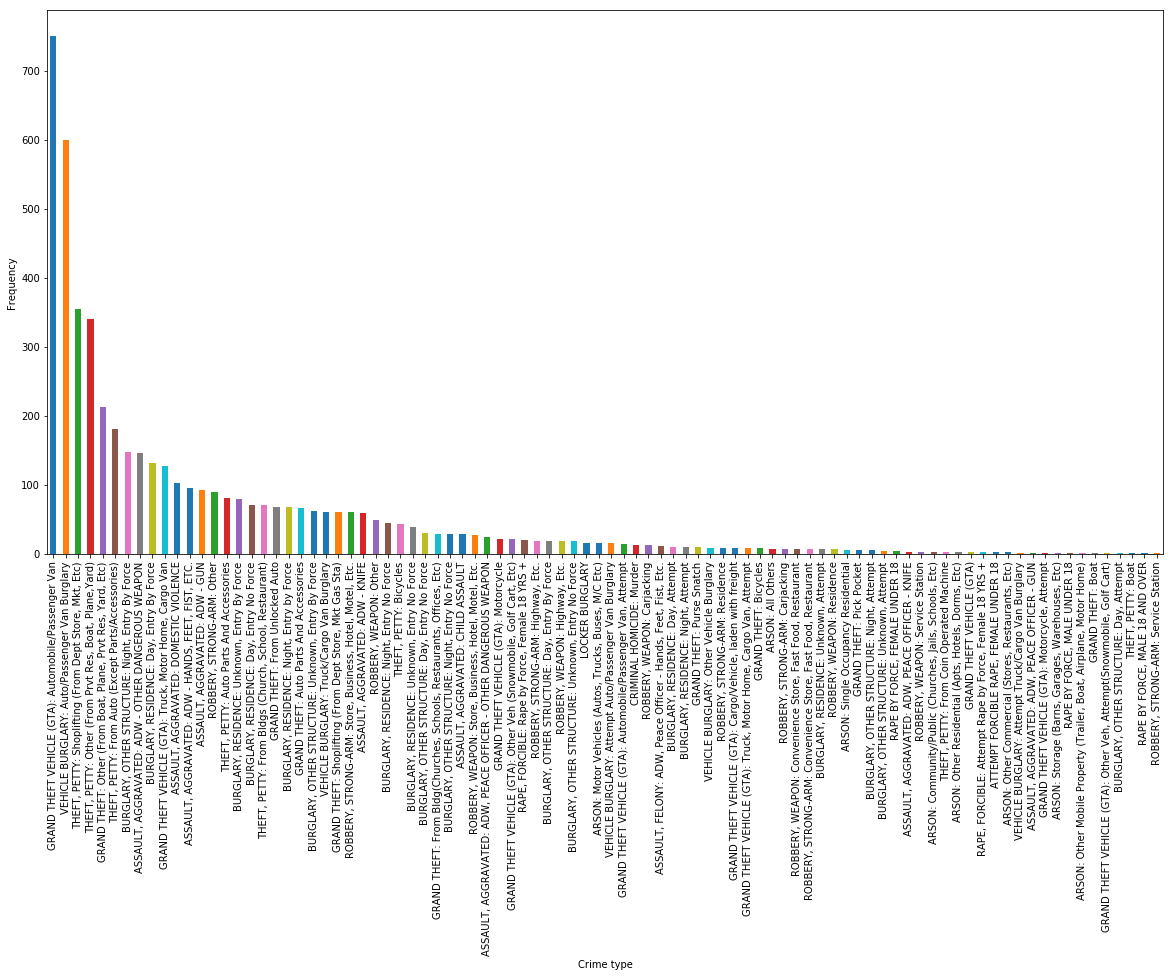

In [161]:
#types of crimes and their frequencies


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
df_train['STAT_DESC'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Crime type')
ax.set_ylabel('Frequency')



#### automobile theft seems to be the most frequent!


In [162]:
len(df_train['STREET'].unique())  #length = 3901

3901

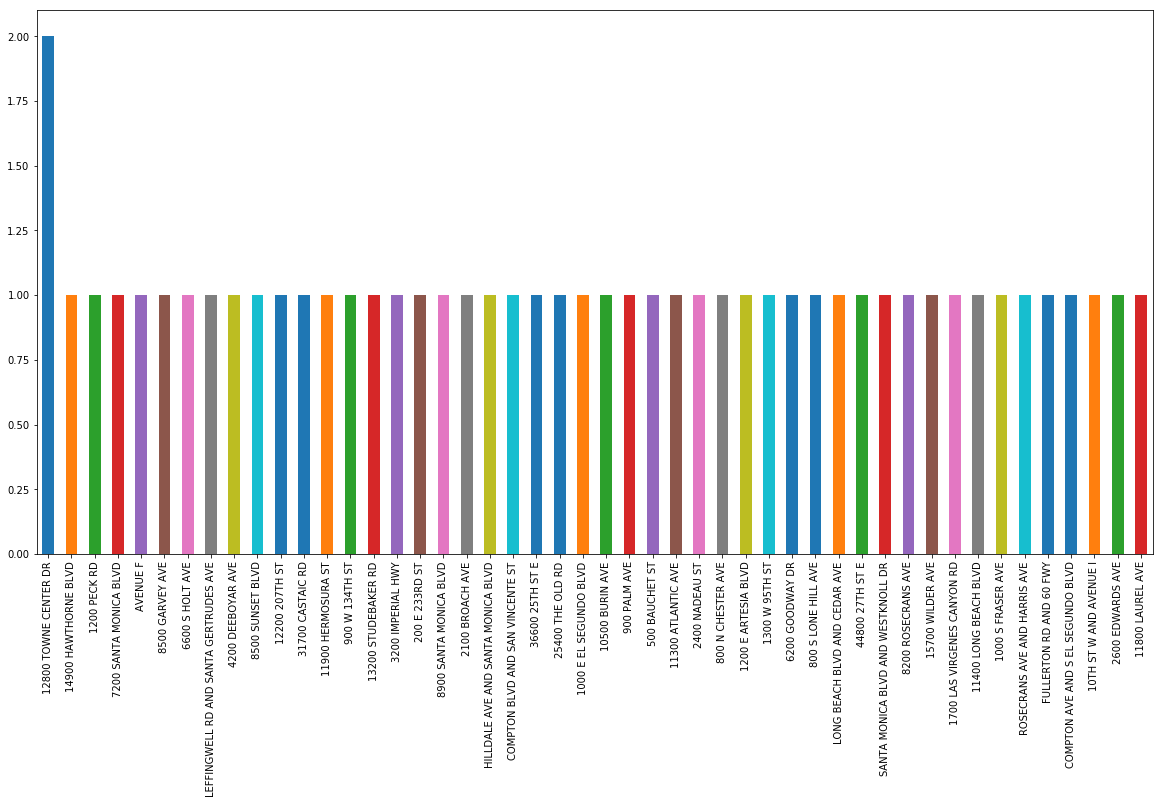

In [163]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'][:50].value_counts().plot(ax=ax, kind='bar')



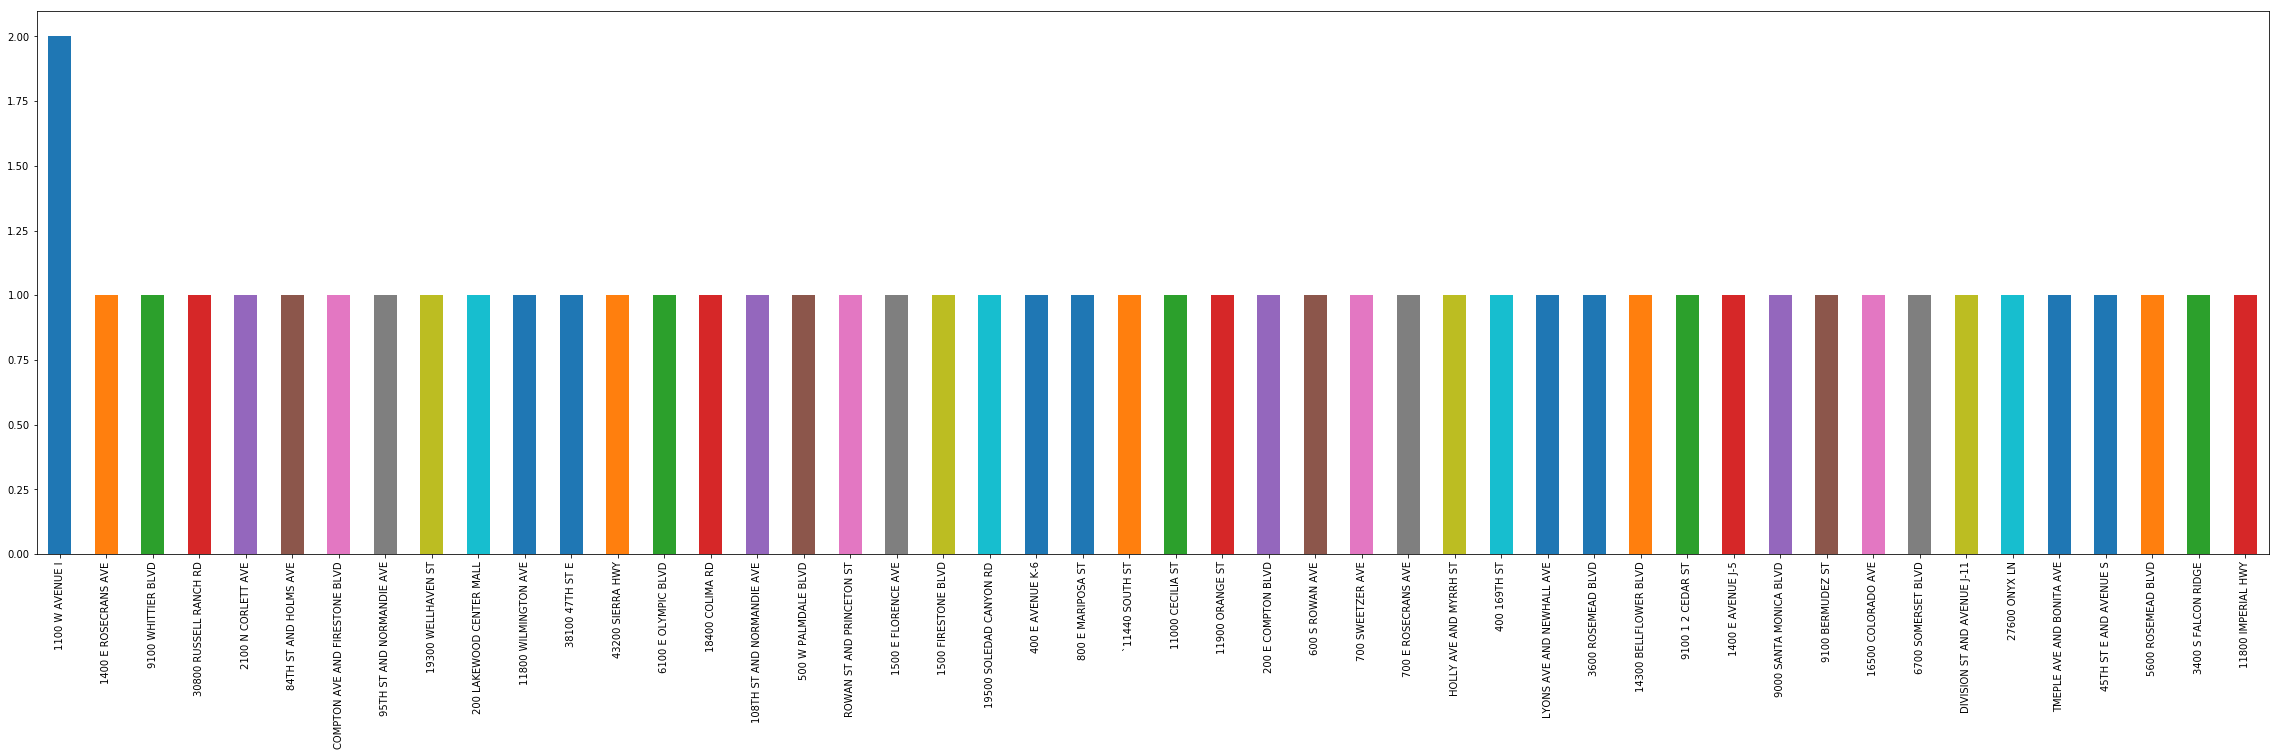

In [164]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(40, 10))
df_train['STREET'][51:100].value_counts().plot(ax=ax, kind='bar')



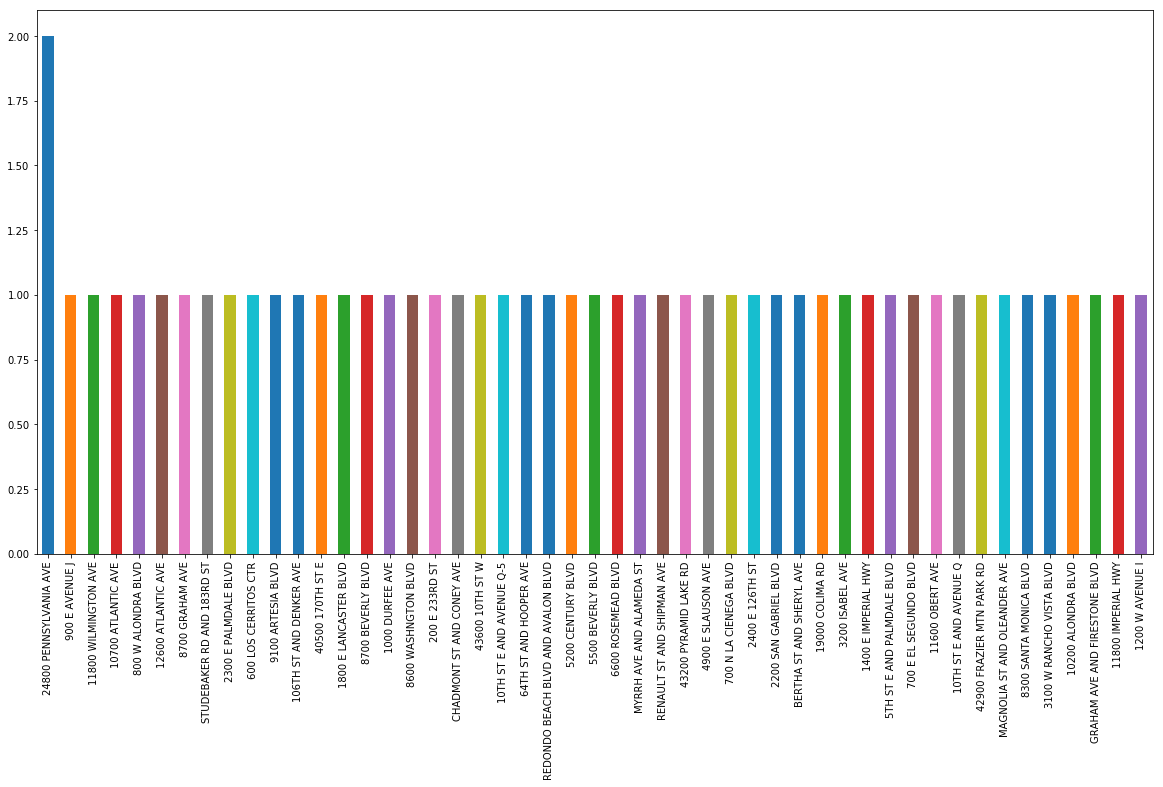

In [165]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'][150:200].value_counts().plot(ax=ax, kind='bar')

Text(0,0.5,'Frequency')

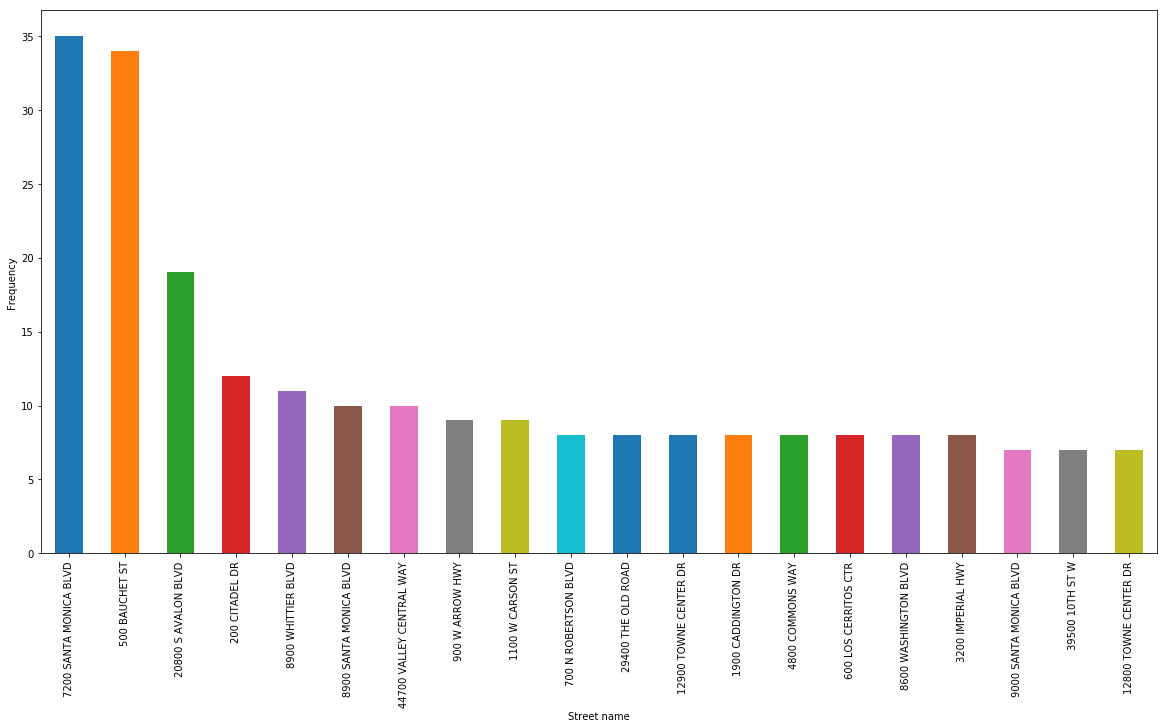

In [166]:
### Location vs crime frequency

fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'].value_counts().head(20).plot(ax=ax, kind='bar')
ax.set_xlabel('Street name')
ax.set_ylabel('Frequency')


## streets with crime rate counts. highest first.


In [167]:
df_train['STREET'].value_counts().max()    #### maximum crime rate in the set of cities

35

In [168]:
df_train['STREET'].mode()   ## the street that has the maximum crime rate.

0    7200 SANTA MONICA BLVD
dtype: object

In [169]:
df_train['STREET'].value_counts().head(10)    ### streets with crime rate counts. highest first.

7200 SANTA MONICA BLVD      35
500 BAUCHET ST              34
20800 S AVALON BLVD         19
200 CITADEL DR              12
8900 WHITTIER BLVD          11
8900 SANTA MONICA BLVD      10
44700 VALLEY CENTRAL WAY    10
900 W ARROW HWY              9
1100 W CARSON ST             9
700 N ROBERTSON BLVD         8
Name: STREET, dtype: int64

In [170]:
# Frequency vs Time. --> when did the crimes happen?
df_train['INCIDENT_DATE'].head(2)

0    16/05/18 12:37
1    23/05/18 13:50
Name: INCIDENT_DATE, dtype: object

In [171]:
times = df_train["INCIDENT_DATE"].str.partition(" ")[2] ### extracting time
times.head()


0    12:37
1    13:50
2    20:38
3    21:30
4    21:55
Name: 2, dtype: object

In [172]:
times.value_counts()   ### as expected, crime rate is high at midnight. (2am,1am,12am and so on)
t = times.value_counts().head(10)
t

2:00     75
1:00     69
12:00    62
2:30     61
3:00     59
0:00     58
0:30     56
3:30     52
23:00    51
1:30     50
Name: 2, dtype: int64

In [173]:
times.head(10)

0    12:37
1    13:50
2    20:38
3    21:30
4    21:55
5    13:48
6    16:02
7     1:46
8    15:08
9    17:30
Name: 2, dtype: object

In [174]:
t.value_counts().plot(ax=ax, kind='bar')

Text(0,0.5,'Frequency')

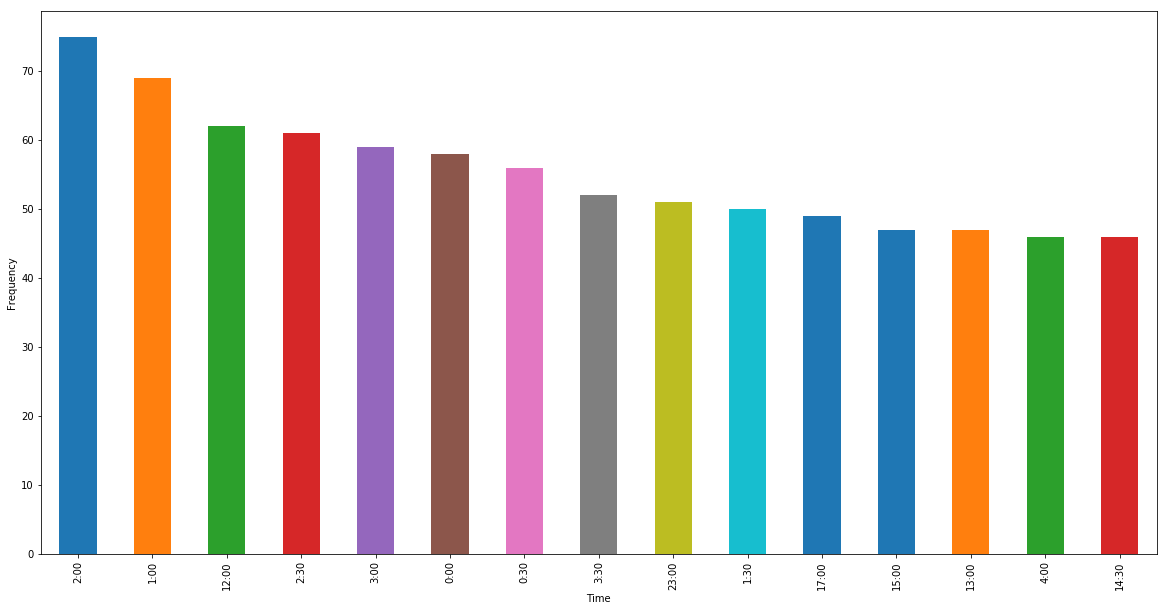

In [175]:
fig, ax = plt.subplots(figsize=(20, 10))
times.value_counts().head(15).plot(ax=ax, kind='bar')       ## time vs frequency
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')

### as expected, crime rate is highest at midnight. (2am,1am,12am and so on)

In [176]:
## converting street names to lat-longs.


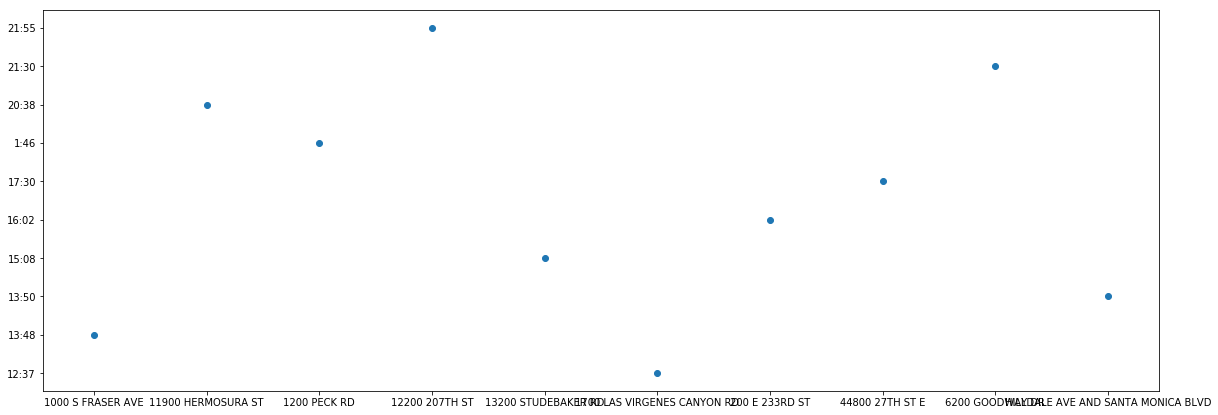

In [177]:
##plot street vs time of crime.
x = df_train['STREET'].head(10)
y = times.head(10)
plt.subplots(figsize=(20, 7))
plt.scatter(x, y)
plt.show()

In [178]:
df_mean = df_train.groupby(['LAT-LONG', 'INCIDENT_DATE']).size() ### time of crime at every location and frequency.
len(df_mean)

4921

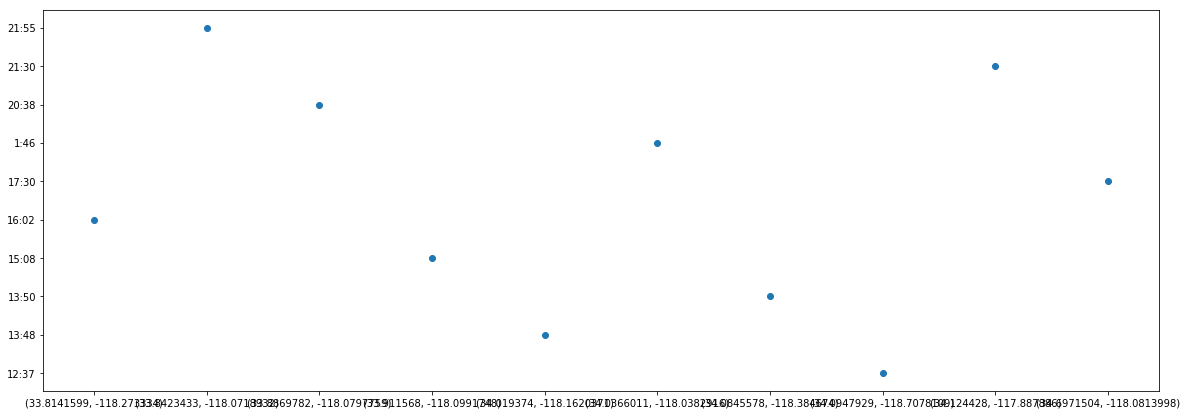

In [179]:
x = df_train['LAT-LONG'].head(10)
y = times.head(10)
plt.subplots(figsize=(20, 7))
plt.scatter(x, y)
plt.show()     #### lat-longs vs time of crime

In [180]:
unique_lat_longs = df_train['LAT-LONG'].unique()
len(unique_lat_longs)

3797

In [181]:
## establishing a metric to calculate crime score for every lat-long point.

print("Calculating the crime score for every lat-long point")

Calculating the crime score for every lat-long point


In [182]:
df_mean = df_train.groupby(['LAT-LONG', 'INCIDENT_DATE']).size().reset_index(name='Counts') ### time of crime at every location and frequency.
df_mean.head(20)


,LAT-LONG,INCIDENT_DATE,Counts
0,"(20.7983626, -156.3319253)",24/05/18 22:55,1
1,"(26.692786, -80.0542583)",07/06/18 9:15,1
2,"(31.4637723, -100.4370375)",23/05/18 14:50,1
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,1
4,"(33.736726, -118.3382919)",23/05/18 14:30,1
5,"(33.738462, -118.3978686)",08/06/18 13:00,1
6,"(33.7399525, -118.3041931)",30/05/18 3:00,1
7,"(33.7404381, -118.3937902)",23/05/18 23:55,1
8,"(33.7452837, -118.3868161)",20/05/18 2:24,1
9,"(33.7555529, -118.309231)",25/05/18 3:15,1


In [183]:
len(df_mean)

4921

In [184]:
i = 0
mappings = {}
for lat_long in df_mean['LAT-LONG']:
    if lat_long in mappings:
        mappings[lat_long] += df_mean['Counts'][i]
    else:
        mappings[lat_long] = df_mean['Counts'][i]
    i+=1
    

In [185]:
mappings
len(mappings)    # 3796 unique points.

3796

In [186]:
mappings

{'(20.7983626, -156.3319253)': 1,
 '(26.692786, -80.0542583)': 1,
 '(31.4637723, -100.4370375)': 1,
 '(32.8246386, -96.73204539999999)': 1,
 '(33.736726, -118.3382919)': 1,
 '(33.738462, -118.3978686)': 1,
 '(33.7399525, -118.3041931)': 1,
 '(33.7404381, -118.3937902)': 1,
 '(33.7452837, -118.3868161)': 1,
 '(33.7555529, -118.309231)': 1,
 '(33.75601650000001, -118.4090335)': 1,
 '(33.7560419, -118.3131165)': 8,
 '(33.7578021, -118.4045215)': 1,
 '(33.7583093, -118.4086185)': 1,
 '(33.7599825, -118.3124554)': 1,
 '(33.7600522, -118.3111573)': 2,
 '(33.7601053, -118.3851628)': 2,
 '(33.7605758, -118.4080561)': 1,
 '(33.7613837, -118.3886029)': 1,
 '(33.7645117, -118.3154482)': 1,
 '(33.7656053, -118.3715011)': 1,
 '(33.7671971, -118.3989782)': 1,
 '(33.7675401, -118.3726365)': 3,
 '(33.7680851, -118.3959941)': 1,
 '(33.7690315, -118.3898906)': 1,
 '(33.7706202, -118.36209)': 1,
 '(33.7725443, -118.3751153)': 1,
 '(33.7731624, -118.4031479)': 1,
 '(33.7750317, -118.3760762)': 1,
 '(33.77

In [187]:
df_recent = df_mean.groupby(['LAT-LONG'], sort=False)['INCIDENT_DATE'].max().reset_index(name='Dates') ### get the recent date of crime for every location

In [188]:
df_start_date = df_mean.groupby(['LAT-LONG'], sort=False)['INCIDENT_DATE'].min().reset_index(name='Dates') 
df_start_date.head(20)

,LAT-LONG,Dates
0,"(20.7983626, -156.3319253)",24/05/18 22:55
1,"(26.692786, -80.0542583)",07/06/18 9:15
2,"(31.4637723, -100.4370375)",23/05/18 14:50
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13
4,"(33.736726, -118.3382919)",23/05/18 14:30
5,"(33.738462, -118.3978686)",08/06/18 13:00
6,"(33.7399525, -118.3041931)",30/05/18 3:00
7,"(33.7404381, -118.3937902)",23/05/18 23:55
8,"(33.7452837, -118.3868161)",20/05/18 2:24
9,"(33.7555529, -118.309231)",25/05/18 3:15


In [189]:
len(df_start_date)
len(df_recent)

3796

In [196]:
date = df_recent["Dates"].str.partition(" ")[0]
date.head(5)
recent_date = date.str.rsplit("/")
recent_date.head(20)
df_recent['formatted_date'] = recent_date

In [197]:
date = df_start_date["Dates"].str.partition(" ")[0]
date.head(5)
start_date = date.str.rsplit("/")
start_date.head(20)
df_start_date['formatted_date'] = start_date

In [198]:
df_start_date.head(5)

,LAT-LONG,Dates,formatted_date
0,"(20.7983626, -156.3319253)",24/05/18 22:55,"[24, 05, 18]"
1,"(26.692786, -80.0542583)",07/06/18 9:15,"[07, 06, 18]"
2,"(31.4637723, -100.4370375)",23/05/18 14:50,"[23, 05, 18]"
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,"[06, 06, 18]"
4,"(33.736726, -118.3382919)",23/05/18 14:30,"[23, 05, 18]"


In [199]:
df_recent.head(5)

,LAT-LONG,Dates,formatted_date
0,"(20.7983626, -156.3319253)",24/05/18 22:55,"[24, 05, 18]"
1,"(26.692786, -80.0542583)",07/06/18 9:15,"[07, 06, 18]"
2,"(31.4637723, -100.4370375)",23/05/18 14:50,"[23, 05, 18]"
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,"[06, 06, 18]"
4,"(33.736726, -118.3382919)",23/05/18 14:30,"[23, 05, 18]"


In [200]:
from datetime import date
f_date = date(2014, 7, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)



9


In [272]:
differences = []
for day1,day2 in zip(df_recent["formatted_date"],df_start_date["formatted_date"]):
    f_date = date(int(day2[2]),int(day2[1]),int(day2[0]))
    l_date = date(int(day1[2]),int(day1[1]),int(day1[0]))
    delta = l_date - f_date
    if delta.days == 0:
        differences.append(1)
    elif delta.days<0:
        delta = f_date-l_date
        differences.append(delta.days)
    else:
        differences.append(delta.days)
df_recent["day span"] = differences

In [273]:
df_recent.head(5)

,LAT-LONG,Dates,formatted_date,day span,Crime count,Crime score
0,"(20.7983626, -156.3319253)",24/05/18 22:55,"[24, 05, 18]",1,1,1.0
1,"(26.692786, -80.0542583)",07/06/18 9:15,"[07, 06, 18]",1,1,1.0
2,"(31.4637723, -100.4370375)",23/05/18 14:50,"[23, 05, 18]",1,1,1.0
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,"[06, 06, 18]",1,1,1.0
4,"(33.736726, -118.3382919)",23/05/18 14:30,"[23, 05, 18]",1,1,1.0


In [ ]:
df_recent
len(df_recent)

In [275]:
df_recent["Crime count"] = mappings.values()

In [276]:
df_recent.head(20)

,LAT-LONG,Dates,formatted_date,day span,Crime count,Crime score
0,"(20.7983626, -156.3319253)",24/05/18 22:55,"[24, 05, 18]",1,1,1.000000
1,"(26.692786, -80.0542583)",07/06/18 9:15,"[07, 06, 18]",1,1,1.000000
2,"(31.4637723, -100.4370375)",23/05/18 14:50,"[23, 05, 18]",1,1,1.000000
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,"[06, 06, 18]",1,1,1.000000
4,"(33.736726, -118.3382919)",23/05/18 14:30,"[23, 05, 18]",1,1,1.000000
5,"(33.738462, -118.3978686)",08/06/18 13:00,"[08, 06, 18]",1,1,1.000000
6,"(33.7399525, -118.3041931)",30/05/18 3:00,"[30, 05, 18]",1,1,1.000000
7,"(33.7404381, -118.3937902)",23/05/18 23:55,"[23, 05, 18]",1,1,1.000000
8,"(33.7452837, -118.3868161)",20/05/18 2:24,"[20, 05, 18]",1,1,1.000000
9,"(33.7555529, -118.309231)",25/05/18 3:15,"[25, 05, 18]",1,1,1.000000


In [61]:
df_recent["Crime score"] = (df_recent["Crime count"]**2)/(df_recent["day span"]*10)

In [62]:
df_recent["day span"].min()

1

In [63]:
df_recent.head(20)

,LAT-LONG,Dates,formatted_date,day span,Crime count,Crime score
0,"(20.7983626, -156.3319253)",24/05/18 22:55,"[24, 05, 18]",1,1,0.100000
1,"(26.692786, -80.0542583)",07/06/18 9:15,"[07, 06, 18]",1,1,0.100000
2,"(31.4637723, -100.4370375)",23/05/18 14:50,"[23, 05, 18]",1,1,0.100000
3,"(32.8246386, -96.73204539999999)",06/06/18 10:13,"[06, 06, 18]",1,1,0.100000
4,"(33.736726, -118.3382919)",23/05/18 14:30,"[23, 05, 18]",1,1,0.100000
5,"(33.738462, -118.3978686)",08/06/18 13:00,"[08, 06, 18]",1,1,0.100000
6,"(33.7399525, -118.3041931)",30/05/18 3:00,"[30, 05, 18]",1,1,0.100000
7,"(33.7404381, -118.3937902)",23/05/18 23:55,"[23, 05, 18]",1,1,0.100000
8,"(33.7452837, -118.3868161)",20/05/18 2:24,"[20, 05, 18]",1,1,0.100000
9,"(33.7555529, -118.309231)",25/05/18 3:15,"[25, 05, 18]",1,1,0.100000


In [64]:
df_recent["Crime score"].max()

122.5

In [65]:
df_recent["Crime score"].min()

0.014285714285714285

In [66]:
new_df = df_recent[['LAT-LONG', 'Crime score','Dates']].copy()

In [68]:
new_df.head(20)

,LAT-LONG,Crime score,Dates
0,"(20.7983626, -156.3319253)",0.100000,24/05/18 22:55
1,"(26.692786, -80.0542583)",0.100000,07/06/18 9:15
2,"(31.4637723, -100.4370375)",0.100000,23/05/18 14:50
3,"(32.8246386, -96.73204539999999)",0.100000,06/06/18 10:13
4,"(33.736726, -118.3382919)",0.100000,23/05/18 14:30
5,"(33.738462, -118.3978686)",0.100000,08/06/18 13:00
6,"(33.7399525, -118.3041931)",0.100000,30/05/18 3:00
7,"(33.7404381, -118.3937902)",0.100000,23/05/18 23:55
8,"(33.7452837, -118.3868161)",0.100000,20/05/18 2:24
9,"(33.7555529, -118.309231)",0.100000,25/05/18 3:15


In [70]:
#### writing to file
new_df.to_csv('crimescores.csv')